# Introduction

Dataset can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

The column names are contained in the following file https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

The original paper which published the dataset can be found here http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

The census from which the dataset was built https://www2.census.gov/library/publications/decennial/1970/phc-1/39204513p3ch05.pdf

# Describe

In [1]:
# Import package that will enable opening of names file from url
from urllib.request import urlopen

# Open the names file and assign it to data
data = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names")

# Adapted from https://bugs.python.org/issue5419
# Decode the content of the names file and print the output
print(data.read().decode('utf-8'))

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [1]:
# Importing pandas
import pandas as pd

# Reading the tab-delimited dataset into a DataFile and adding column names from the housing.names file shown above
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

# Viewing the first five rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualising the dataset

### Scatter plots

The MEDV is the variable that we will be trying to predict using the keras machine learning library.

From the scatter plot below, there appears to be a negative correlation with house prices and the following: CRIM, INDUS, NOX, LSTAT, PTRATIO and possibly TAX.

There appears to be a positive correlation between house prices and RM

<Figure size 432x288 with 0 Axes>

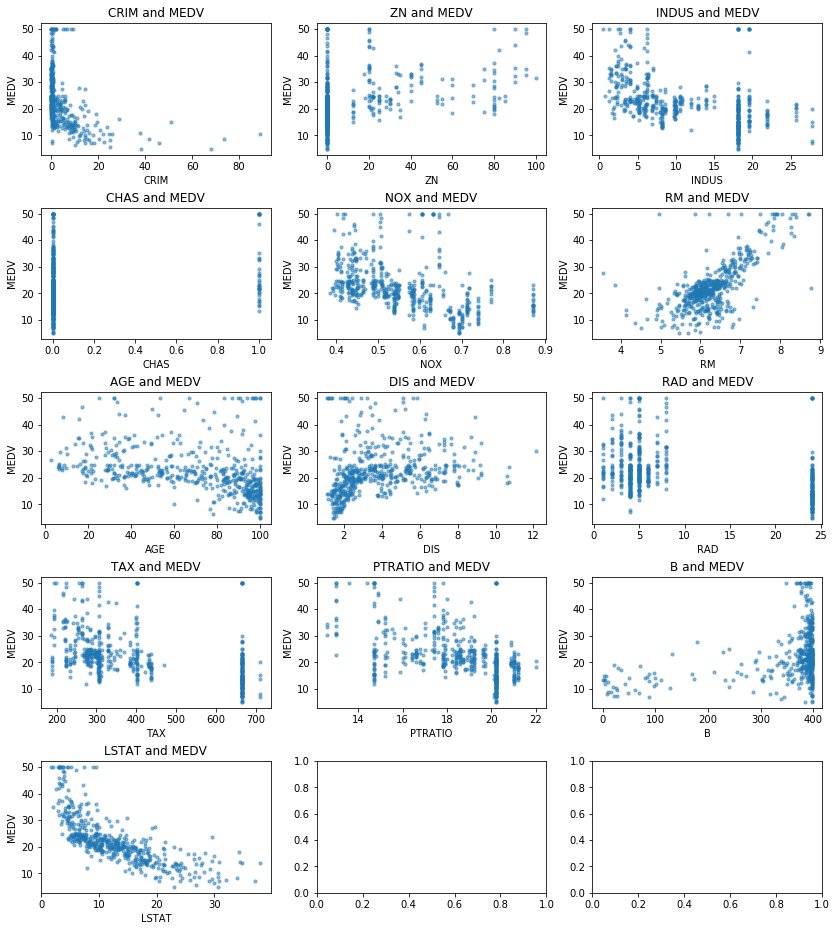

In [48]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], alpha=0.5, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')
plt.show()

### Creating a correlation heat map

In [4]:
# Creating a correlation matrix
corr = df.corr()

corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
# Creating a correlation heatmap
# Adapted from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas/50703596

# Offsetting the low value by 1 - 0.77 (the largest negative) = 0.23
corr.style.background_gradient(cmap='coolwarm', axis=None, low=0.23, high=0).set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


### Deciding which variables to look at

From the above the variables that strongly correlate with MEDV (either positively or negatively) are LSTAT (-0.74),PTRATIO (-0.51) and RM (0.70). These are the variables that I will use later on to build a prediction model to predict the median house price. I will also look at CHAS as the next section looks at using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.

### Summary statistics

In [6]:
df2 = df[["MEDV", "PTRATIO", "RM", "INDUS", "CHAS"]]

df2.describe()

,MEDV,PTRATIO,RM,INDUS,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,18.455534,6.284634,11.136779,0.069170
std,9.197104,2.164946,0.702617,6.860353,0.253994
min,5.000000,12.600000,3.561000,0.460000,0.000000
25%,17.025000,17.400000,5.885500,5.190000,0.000000
50%,21.200000,19.050000,6.208500,9.690000,0.000000
75%,25.000000,20.200000,6.623500,18.100000,0.000000
max,50.000000,22.000000,8.780000,27.740000,1.000000


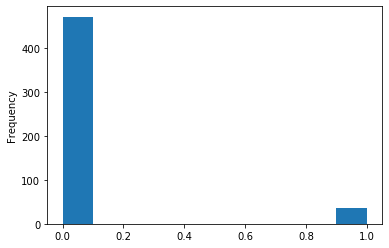

In [7]:
# Displaying the frequency of houses that are on/not on Charles river
df2["CHAS"].plot.hist()

## Inferential Statistics

We are interested in determining if there is a significant difference in house prices between houses that are along the Charles River and those that aren't. The Boston House Prices dataset does not contain the data for the entire population of houses in Boston but instead contains a sample which are the median values for each town. We can use inferential statistics to make inferences about the population from the sample data [towardsdatascience-Inferential Statistics for Data Science](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a). Inferential statistics can be used to determine the probability that there is a true relationship between two variables [Science Direct-Inferential Statistics](https://www.sciencedirect.com/topics/medicine-and-dentistry/inferential-statistics).  

### Selecting an appropriate test



#### Requirements for a Student t-test

Before conducting a t-test we will first examine if doing a t-test in this case is appropriate. 

(need reference to list of requirements for t-test)


MEDV distribution for tracts along Charles River and MEDV distribution for tracts not along Charles River.

As the two CHAS variables are independent of each other then an independent t-test should be used as apposed to .....

There will be only one comparison made: MEDV for CHAS = 0 and MEDV for CHAS = 1. As there is only one comparison to be made an ANOVA isn't necessary in this case and a t-test will be sufficient.


...........

Unequal sample sizes and different variances, therefore Student t-test is not appropriate

#### Requirements for a Welch t-test
Welch test can be used in place of the student t-test where the variance and/or sample sizes differ.


However, as seen below the distributions are not normal which is also a requirement for the Welch test **give reference**

#### Non-Parametric Data

As the data is not normally distributed a non-parametric test should be used. [University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests). The Mann-Whitney U test (or Wilcoxon rank-sum test) can be used for non-para-metric data to test for the difference between two independent variables.[University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests)


#### Visualising the data to determine if they are normally distributed

In [8]:
# Importing seaborn to create distplots
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


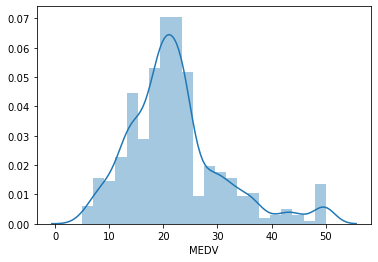

In [9]:
# Displot for tract not along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 0])

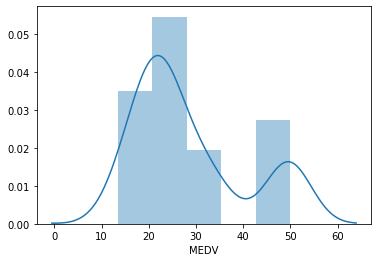

In [10]:
# Displot for tract along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 1])

In [11]:
# Importing stats module from scipy
from scipy import stats

# Determining if the distribution for tracts along Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 1])

(0.8359232544898987, 0.00011230883683310822)

In [12]:
# Determining if the distribution for tracts not along the Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 0])

(0.9282605051994324, 3.113930960958397e-14)

In [13]:
# Determining the mean for both groups
df["MEDV"].groupby(df["CHAS"]).mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [14]:
# Determining the count for both groups
df["MEDV"].groupby(df["CHAS"]).count()

CHAS
0    471
1     35
Name: MEDV, dtype: int64

In [15]:
# Determining the variance for both groups
df["MEDV"].groupby(df["CHAS"]).var()

CHAS
0     77.992962
1    139.633059
Name: MEDV, dtype: float64

In [16]:
# Determining the standard deviation for both groups
df["MEDV"].groupby(df["CHAS"]).std()

CHAS
0     8.831362
1    11.816643
Name: MEDV, dtype: float64

### Student t-test

The p-value for the Student t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [17]:
# Code for Student t-test

from scipy.stats import ttest_ind as tti

stti_stat, stti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=True)

stti_p

7.390623170519905e-05

### Welch t-test

The p-value for the Welch t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [18]:
# Code for Welch t-test

from scipy.stats import ttest_ind as tti

wtti_stat, wtti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=False)

wtti_p

0.003567170098137517

### Mann-Whitney U test 

The p-value for the Mann-Whitney U test is less than 0.05 which strongly suggests that the sample distributions are different.

In [19]:
# Code for Mann-Whitney U test

from scipy.stats import mannwhitneyu as mwu

mwu(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

### Hypothesis testing

## Predict

This is a regression predictive modeling problem. Regression predictive modeling problems involve predicting a real-valued quantity [machinelearningmastery - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

### Preparing the data for the neural network

Creating separate columns for true and false values for CHAS

In [20]:
import numpy as np


# Adapted from course materials
df["CHAS_True"] = df["CHAS"]
df["CHAS_False"] = (df["CHAS"] == 0).astype(np.int)

Separating the data into the independent variables 'PTRATIO', 'RM' and 'INDUS' and the target variable 'MEDV'

In [21]:
# Input/independent variables

X = df.drop(columns=["MEDV", "CHAS"])#X = df[["PTRATIO", "RM", "INDUS"]]

# Output/dependent variable

y = df["MEDV"]

In [22]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0,1


In [23]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Splitting datasets into random train and test subsets

Setting the test size to 33% of the dataset

In [24]:
# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the output and input datasets into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
395,8.71675,0.0,18.10,0.6930,6.471,98.8,1.7257,24,666.0,20.2,391.98,17.12,0,1
390,6.96215,0.0,18.10,0.7000,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11,0,1
273,0.22188,20.0,6.96,0.4640,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58,1,0
263,0.82526,20.0,3.97,0.6470,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25,0,1
315,0.25356,0.0,9.90,0.5440,5.705,77.7,3.9450,4,304.0,18.4,396.42,11.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,14.33370,0.0,18.10,0.6140,6.229,88.0,1.9512,24,666.0,20.2,383.32,13.11,0,1
463,5.82115,0.0,18.10,0.7130,6.513,89.9,2.8016,24,666.0,20.2,393.82,10.29,0,1
214,0.28955,0.0,10.59,0.4890,5.412,9.8,3.5875,4,277.0,18.6,348.93,29.55,0,1
493,0.17331,0.0,9.69,0.5850,5.707,54.0,2.3817,6,391.0,19.2,396.90,12.01,0,1


In [26]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
55,0.01311,90.0,1.22,0.403,7.249,21.9,8.6966,5,226.0,17.9,395.93,4.81,0,1
52,0.05360,21.0,5.64,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,0,1
29,1.00245,0.0,8.14,0.538,6.674,87.3,4.2390,4,307.0,21.0,380.23,11.98,0,1
138,0.24980,0.0,21.89,0.624,5.857,98.2,1.6686,4,437.0,21.2,392.04,21.32,0,1
333,0.05083,0.0,5.19,0.515,6.316,38.1,6.4584,5,224.0,20.2,389.71,5.68,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.08265,0.0,13.92,0.437,6.127,18.4,5.5027,4,289.0,16.0,396.90,8.58,0,1
343,0.02543,55.0,3.78,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,0,1
216,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,5,276.0,16.4,392.80,13.51,1,0
397,7.67202,0.0,18.10,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92,0,1


In [27]:
y_train

395    13.1
390    15.1
273    35.2
263    31.0
315    16.2
       ... 
479    21.4
463    20.2
214    23.7
493    21.8
332    19.4
Name: MEDV, Length: 339, dtype: float64

In [28]:
y_test

55     35.4
52     25.0
29     21.0
138    13.3
333    22.2
       ... 
293    23.9
343    23.9
216    23.3
397     8.5
364    21.9
Name: MEDV, Length: 167, dtype: float64

### Defining the neural net

There are 3 input variables so the input_dim below is set to 3. Experimenting with 1.5 times more hidden nodes in the first layer compared to the input layer. Second hidden layer has the same number of nodes (4) as the input layer. All layers are using the ReLU activation function. **(Why and explanation of ReLU)**

In [29]:
# Adapted from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Importing packages
from keras.models import Sequential
from keras.layers import Dense

# Defining the neural network
model = Sequential()
model.add(Dense(28, input_dim=14, activation='elu'))
model.add(Dense(14, activation='elu'))
model.add(Dense(1, activation='elu'))


Using TensorFlow backend.


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


### Compiling the neural net

As this is a regression problem, a Regression Loss Function will be used. Initially setting this to a Mean Squared Error Loss fuction.

In [31]:
# Compiling the neural net
model.compile(loss='mean_squared_error', optimizer='adam')

### Fitting the neural net to the training dataset

In [32]:
# Fitting the neural net

model.fit(X_train.values, y_train.values, epochs=1500, batch_size=8)

Epoch 1/1500
339/339 [==============================] - 2s 5ms/step - loss: 776.1737
Epoch 2/1500
339/339 [==============================] - 0s 333us/step - loss: 95.2670
Epoch 3/1500
339/339 [==============================] - 0s 295us/step - loss: 71.4806
Epoch 4/1500
339/339 [==============================] - 0s 324us/step - loss: 69.6473
Epoch 5/1500
339/339 [==============================] - 0s 363us/step - loss: 61.5966
Epoch 6/1500
339/339 [==============================] - 0s 442us/step - loss: 60.3993
Epoch 7/1500
339/339 [==============================] - 0s 348us/step - loss: 59.7263
Epoch 8/1500
339/339 [==============================] - 0s 336us/step - loss: 58.8037
Epoch 9/1500
339/339 [==============================] - 0s 369us/step - loss: 53.2290
Epoch 10/1500
339/339 [==============================] - 0s 351us/step - loss: 55.9616
Epoch 11/1500
339/339 [==============================] - 0s 363us/step - loss: 53.8702
Epoch 12/1500
339/339 [==============================

339/339 [==============================] - 0s 313us/step - loss: 18.1469
Epoch 187/1500
339/339 [==============================] - 0s 251us/step - loss: 20.7324
Epoch 188/1500
339/339 [==============================] - 0s 277us/step - loss: 16.4101
Epoch 189/1500
339/339 [==============================] - 0s 380us/step - loss: 20.0372
Epoch 190/1500
339/339 [==============================] - 0s 454us/step - loss: 19.9823
Epoch 191/1500
339/339 [==============================] - 0s 548us/step - loss: 19.1218
Epoch 192/1500
339/339 [==============================] - 0s 451us/step - loss: 18.8862
Epoch 193/1500
339/339 [==============================] - 0s 454us/step - loss: 18.9767
Epoch 194/1500
339/339 [==============================] - 0s 345us/step - loss: 19.9401
Epoch 195/1500
339/339 [==============================] - 0s 369us/step - loss: 23.2857
Epoch 196/1500
339/339 [==============================] - 0s 360us/step - loss: 17.5232
Epoch 197/1500
339/339 [=======================

339/339 [==============================] - 0s 348us/step - loss: 13.5157
Epoch 280/1500
339/339 [==============================] - 0s 366us/step - loss: 18.0580
Epoch 281/1500
339/339 [==============================] - 0s 354us/step - loss: 12.2984
Epoch 282/1500
339/339 [==============================] - 0s 345us/step - loss: 12.1329
Epoch 283/1500
339/339 [==============================] - 0s 333us/step - loss: 13.2861
Epoch 284/1500
339/339 [==============================] - 0s 339us/step - loss: 13.6997
Epoch 285/1500
339/339 [==============================] - 0s 330us/step - loss: 11.8915
Epoch 286/1500
339/339 [==============================] - 0s 339us/step - loss: 13.9199
Epoch 287/1500
339/339 [==============================] - 0s 363us/step - loss: 12.4915
Epoch 288/1500
339/339 [==============================] - 0s 345us/step - loss: 13.6165
Epoch 289/1500
339/339 [==============================] - 0s 348us/step - loss: 11.3818
Epoch 290/1500
339/339 [=======================

Epoch 372/1500
339/339 [==============================] - 0s 357us/step - loss: 12.5448
Epoch 373/1500
339/339 [==============================] - 0s 366us/step - loss: 12.1011
Epoch 374/1500
339/339 [==============================] - 0s 348us/step - loss: 10.5790
Epoch 375/1500
339/339 [==============================] - 0s 354us/step - loss: 10.6274
Epoch 376/1500
339/339 [==============================] - 0s 315us/step - loss: 11.8571
Epoch 377/1500
339/339 [==============================] - 0s 342us/step - loss: 11.1797
Epoch 378/1500
339/339 [==============================] - 0s 336us/step - loss: 12.7091
Epoch 379/1500
339/339 [==============================] - 0s 313us/step - loss: 11.7145
Epoch 380/1500
339/339 [==============================] - 0s 310us/step - loss: 12.7552
Epoch 381/1500
339/339 [==============================] - 0s 307us/step - loss: 11.7314
Epoch 382/1500
339/339 [==============================] - 0s 295us/step - loss: 11.3939
Epoch 383/1500
339/339 [========

339/339 [==============================] - 0s 463us/step - loss: 10.1287
Epoch 466/1500
339/339 [==============================] - 0s 383us/step - loss: 11.3479
Epoch 467/1500
339/339 [==============================] - 0s 495us/step - loss: 8.8951
Epoch 468/1500
339/339 [==============================] - 0s 374us/step - loss: 10.3481
Epoch 469/1500
339/339 [==============================] - 0s 386us/step - loss: 8.9839
Epoch 470/1500
339/339 [==============================] - 0s 351us/step - loss: 9.3724
Epoch 471/1500
339/339 [==============================] - 0s 422us/step - loss: 9.7716
Epoch 472/1500
339/339 [==============================] - 0s 419us/step - loss: 9.9706
Epoch 473/1500
339/339 [==============================] - 0s 313us/step - loss: 9.2657
Epoch 474/1500
339/339 [==============================] - 0s 663us/step - loss: 9.7937
Epoch 475/1500
339/339 [==============================] - 0s 522us/step - loss: 11.3753
Epoch 476/1500
339/339 [==============================

339/339 [==============================] - 0s 256us/step - loss: 7.8426
Epoch 653/1500
339/339 [==============================] - 0s 242us/step - loss: 7.7505
Epoch 654/1500
339/339 [==============================] - 0s 251us/step - loss: 7.6661
Epoch 655/1500
339/339 [==============================] - ETA: 0s - loss: 10.48 - 0s 268us/step - loss: 8.7450
Epoch 656/1500
339/339 [==============================] - 0s 286us/step - loss: 7.4512
Epoch 657/1500
339/339 [==============================] - 0s 310us/step - loss: 7.9240
Epoch 658/1500
339/339 [==============================] - 0s 310us/step - loss: 8.1885
Epoch 659/1500
339/339 [==============================] - 0s 262us/step - loss: 8.3672
Epoch 660/1500
339/339 [==============================] - 0s 307us/step - loss: 8.8108
Epoch 661/1500
339/339 [==============================] - 0s 283us/step - loss: 8.9556
Epoch 662/1500
339/339 [==============================] - 0s 277us/step - loss: 7.9126
Epoch 663/1500
339/339 [==========

339/339 [==============================] - 0s 277us/step - loss: 6.5156
Epoch 840/1500
339/339 [==============================] - 0s 254us/step - loss: 7.5186
Epoch 841/1500
339/339 [==============================] - 0s 236us/step - loss: 7.7296
Epoch 842/1500
339/339 [==============================] - 0s 262us/step - loss: 8.9554
Epoch 843/1500
339/339 [==============================] - 0s 259us/step - loss: 7.4522
Epoch 844/1500
339/339 [==============================] - 0s 233us/step - loss: 7.7418
Epoch 845/1500
339/339 [==============================] - 0s 262us/step - loss: 7.7970
Epoch 846/1500
339/339 [==============================] - 0s 254us/step - loss: 7.6315
Epoch 847/1500
339/339 [==============================] - 0s 245us/step - loss: 7.5960
Epoch 848/1500
339/339 [==============================] - 0s 239us/step - loss: 7.6380
Epoch 849/1500
339/339 [==============================] - 0s 262us/step - loss: 7.7745
Epoch 850/1500
339/339 [==============================] - 

339/339 [==============================] - 0s 248us/step - loss: 6.0686
Epoch 1026/1500
339/339 [==============================] - 0s 254us/step - loss: 5.9449
Epoch 1027/1500
339/339 [==============================] - 0s 251us/step - loss: 6.0449
Epoch 1028/1500
339/339 [==============================] - 0s 248us/step - loss: 5.8806
Epoch 1029/1500
339/339 [==============================] - 0s 256us/step - loss: 6.2486
Epoch 1030/1500
339/339 [==============================] - 0s 256us/step - loss: 5.6839
Epoch 1031/1500
339/339 [==============================] - 0s 277us/step - loss: 6.4876
Epoch 1032/1500
339/339 [==============================] - 0s 262us/step - loss: 6.6244
Epoch 1033/1500
339/339 [==============================] - 0s 248us/step - loss: 7.4575
Epoch 1034/1500
339/339 [==============================] - 0s 254us/step - loss: 6.1997
Epoch 1035/1500
339/339 [==============================] - 0s 254us/step - loss: 7.4017
Epoch 1036/1500
339/339 [=======================

339/339 [==============================] - 0s 363us/step - loss: 6.9323
Epoch 1210/1500
339/339 [==============================] - 0s 277us/step - loss: 7.1170
Epoch 1211/1500
339/339 [==============================] - 0s 274us/step - loss: 5.7321
Epoch 1212/1500
339/339 [==============================] - 0s 339us/step - loss: 5.5125
Epoch 1213/1500
339/339 [==============================] - 0s 298us/step - loss: 5.7747
Epoch 1214/1500
339/339 [==============================] - 0s 336us/step - loss: 6.7187
Epoch 1215/1500
339/339 [==============================] - 0s 339us/step - loss: 5.0132
Epoch 1216/1500
339/339 [==============================] - 0s 439us/step - loss: 6.2347
Epoch 1217/1500
339/339 [==============================] - 0s 292us/step - loss: 6.5988
Epoch 1218/1500
339/339 [==============================] - 0s 348us/step - loss: 5.8314
Epoch 1219/1500
339/339 [==============================] - 0s 289us/step - loss: 7.4480
Epoch 1220/1500
339/339 [=======================

339/339 [==============================] - 0s 310us/step - loss: 5.5464
Epoch 1303/1500
339/339 [==============================] - 0s 310us/step - loss: 5.5071
Epoch 1304/1500
339/339 [==============================] - 0s 646us/step - loss: 6.3266
Epoch 1305/1500
339/339 [==============================] - 0s 422us/step - loss: 5.1417
Epoch 1306/1500
339/339 [==============================] - 0s 360us/step - loss: 5.2877
Epoch 1307/1500
339/339 [==============================] - 0s 371us/step - loss: 5.7851
Epoch 1308/1500
339/339 [==============================] - 0s 392us/step - loss: 5.3970
Epoch 1309/1500
339/339 [==============================] - 0s 401us/step - loss: 6.4830
Epoch 1310/1500
339/339 [==============================] - 0s 433us/step - loss: 5.2321
Epoch 1311/1500
339/339 [==============================] - 0s 439us/step - loss: 5.3376
Epoch 1312/1500
339/339 [==============================] - 0s 380us/step - loss: 5.0180
Epoch 1313/1500
339/339 [=======================

339/339 [==============================] - 0s 310us/step - loss: 5.4383
Epoch 1488/1500
339/339 [==============================] - 0s 289us/step - loss: 5.7256
Epoch 1489/1500
339/339 [==============================] - 0s 313us/step - loss: 5.1976
Epoch 1490/1500
339/339 [==============================] - 0s 289us/step - loss: 5.1266
Epoch 1491/1500
339/339 [==============================] - 0s 315us/step - loss: 4.9092
Epoch 1492/1500
339/339 [==============================] - 0s 310us/step - loss: 4.8147
Epoch 1493/1500
339/339 [==============================] - 0s 292us/step - loss: 6.0874
Epoch 1494/1500
339/339 [==============================] - 0s 369us/step - loss: 5.6581
Epoch 1495/1500
339/339 [==============================] - 0s 315us/step - loss: 5.3246
Epoch 1496/1500
339/339 [==============================] - 0s 315us/step - loss: 5.4587
Epoch 1497/1500
339/339 [==============================] - 0s 318us/step - loss: 5.3668
Epoch 1498/1500
339/339 [=======================

### Evaluating the neural net

In [33]:
y_predicted = model.predict(X_test.values)

absoluteError = 0

for i in range(len(y_predicted)):
    print(f"Predicted: {y_predicted[i,0]}, Actual: {y_test.iloc[i]}, Difference: {y_predicted[i,0] - y_test.iloc[i]}")
    absoluteError = absoluteError + (y_predicted[i,0] - y_test.iloc[i])**2
    
meanAbsoluteError = absoluteError/len(y_predicted)

rootMeanSquareError = meanAbsoluteError**0.5

rootMeanSquareError

Predicted: 37.66065216064453, Actual: 35.4, Difference: 2.2606521606445327
Predicted: 26.916921615600586, Actual: 25.0, Difference: 1.916921615600586
Predicted: 20.813024520874023, Actual: 21.0, Difference: -0.18697547912597656
Predicted: 18.048368453979492, Actual: 13.3, Difference: 4.7483684539794915
Predicted: 21.048734664916992, Actual: 22.2, Difference: -1.151265335083007
Predicted: 15.351041793823242, Actual: 13.3, Difference: 2.0510417938232415
Predicted: 19.943239212036133, Actual: 17.1, Difference: 2.8432392120361314
Predicted: 23.95460319519043, Actual: 22.9, Difference: 1.054603195190431
Predicted: 21.755971908569336, Actual: 22.2, Difference: -0.44402809143066335
Predicted: 19.837331771850586, Actual: 20.6, Difference: -0.7626682281494155
Predicted: 18.19484519958496, Actual: 19.9, Difference: -1.7051548004150376
Predicted: 17.710512161254883, Actual: 18.9, Difference: -1.1894878387451158
Predicted: 32.5859375, Actual: 50.0, Difference: -17.4140625
Predicted: 24.44231986999

Predicted: 22.601503372192383, Actual: 23.3, Difference: -0.6984966278076179
Predicted: 23.115026473999023, Actual: 22.3, Difference: 0.8150264739990227
Predicted: 23.4093074798584, Actual: 22.8, Difference: 0.6093074798583977
Predicted: 20.8568172454834, Actual: 17.8, Difference: 3.0568172454833977
Predicted: 18.11329460144043, Actual: 17.4, Difference: 0.7132946014404311
Predicted: 21.07484245300293, Actual: 19.3, Difference: 1.774842453002929
Predicted: 20.500532150268555, Actual: 14.2, Difference: 6.300532150268555
Predicted: 28.33757209777832, Actual: 33.1, Difference: -4.762427902221681
Predicted: 7.551173210144043, Actual: 13.2, Difference: -5.648826789855956
Predicted: 36.73352813720703, Actual: 23.3, Difference: 13.43352813720703
Predicted: 23.855649948120117, Actual: 24.4, Difference: -0.5443500518798814
Predicted: 34.96737289428711, Actual: 43.1, Difference: -8.132627105712892
Predicted: 18.601259231567383, Actual: 18.8, Difference: -0.1987407684326179
Predicted: 27.13421440

4.339142023002233